# Práctico 6

In [2]:
from random import random
import numpy as np 
from scipy import stats

## Ejercicio 1  
Genere $n$ valores de una variable aleatoria normal estándar de manera tal que se cumplan las condiciones: $n \ge 100$ y $S / \sqrt{n} < 0,1$, siendo S el estimador de la desviación estándar de los n datos generados.  

a) ¿Cuál es el número de datos generados efectivamente?  
b) ¿Cuál es la media muestral de los datos generados?  
c) ¿Cuál es la varianza muestral de los datos generados?  

In [89]:
def media_muestral(d=0.1):
    X = np.random.normal()
    media = X
    Scuad = 0
    n = 1
    
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        X = np.random.normal()
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 / (n-1)) + n * (media - media_ant)**2
        
    return n, media, Scuad

# Ejecutamos la simulación
n, media_m, var_m = media_muestral()
print(f"(a) n = {n}\n(b) Media muestral = {media_m:.4f}\n(c) Varianza muestral = {var_m:.4f}")

(a) n = 102
(b) Media muestral = -0.2062
(c) Varianza muestral = 1.0171


## Ejercicio 2  
Estime mediante el método de Monte Carlo la integral  
$$ i) \int_{0}^1 \frac{e^{x}}{\sqrt{2x}}\,dx $$
$$ ii) \int_{-\infty}^{\infty} x^{2}exp(-x^2)\,dx $$  

Genere al menos 100 valores y deténgase cuando la desviación estándar muestral $S$ del estimador sea menor que $0,01$.


In [ ]:
# i)

def monteCarlo_0_a_1(g, Nsim):
    integral = 0
    for _ in range(Nsim):
        integral += g(random())
    return integral / Nsim



def g_i(u):
    return np.exp(u) / np.sqrt(2*u)

print("Media por montecarlo:", monteCarlo_0_a_1(g_i, 100000)) # ~ 2.07


def Media_Muestral_X(d=0.01):
    n = 1
    X = g_i(random())
    media = X / n
    Scuad = 0
    while n <= 100 or np.sqrt(Scuad/n) > d:
        n += 1
        X = g_i(random())
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_ant)**2
    return n, media

n, mediaMuestral = Media_Muestral_X() 
print(f"Por estimacion muestral tomó: {n} iteraciones")

print("Por estimacion muestral:", mediaMuestral)

"""
Se quiere estimar mediante un intervalo de confianza de 95% el valor de la siguiente integral:
integral_0^1 (sen(x)/2x) dx
En el paso n = 109, se obtienen los siguientes valores:
S^2(109) = 0.1, ¯X(109) = 0.5, U_110 = π/6,
donde U_110 es el valor de la variable uniforme sorteada en el paso 110 de la simulación.
a) Calcular S^2(110).
b) Usar este valor para calcular la longitud del intervalo de confianza del 95%.

Scuad(109) = 0.1
media(109) = 0.5
U_110 = pi/6

generamos X con u = pi/6
X = 0.4775
media_ant = media(109) = 0.5
media = 0.5 + (0.4775 - 0.5) / 110 => 0.4998
Scuad = 0.1 * (1 - 1 /(110-1)) + 110*(0.4998 - 0.5)**2 => 0.0991

alpha = 0.95
z_alpha_2 = stats.norm.ppf(1 - (1 - 0.95) / 2) => 1.96

IC = (0.4998 - 1.96 * np.sqrt(Scuad) / np.sqrt(110), 0.4998 + 1.96 * np.sqrt(Scuad) / np.sqrt(110))


IC = (0.4410, 0.5586), la longitud es 0.1176
"""

print(f"{(0.4998 - 1.96 * np.sqrt(0.0991) / np.sqrt(110), 0.4998 + 1.96 * np.sqrt(0.0991) / np.sqrt(110))}")


Media por montecarlo: 2.064797795877232
Por estimacion muestral tomó: 25456 iteraciones
Por estimacion muestral: 2.0546087267777002
-0.7384
-1.0171
0.3646


$$ ii) \int_{-\infty}^{\infty} x^{2}exp(-x^2)\,dx $$
Tomemos $x=1$, vemos que $(1)^{2}exp(-(1)^2)$ = $exp(-1)$  
Tomemos $x=-1$, vemos que $(-1)^{2}exp(-(-1)^2)$ = $1.exp(-1)$ = $exp(-1)$  

Por lo tanto es simetrica, entonces  
$$ \int_{-\infty}^{\infty} x^{2}exp(-x^2)\,dx $$  
$$ = \int_{-\infty}^{0} x^{2}exp(-x^2)\,dx + \int_{0}^{\infty} x^{2}exp(-x^2)\,dx $$  
$$ = 2 \int_{0}^{\infty} x^{2}exp(-x^2)\,dx $$  

Aplicamos monteCarlo:  
Hacemos cambio de variable $ y = \frac{1}{x+1} $, vemos que si $x = 0; y = 1$ y si $x \rightarrow \infty; y = 0$  
Entonces 
$$ y = \frac{1}{x+1} $$  
$$\rightarrow y(x+1) = 1 $$  
$$ \rightarrow x+1 = \frac{1}{y} $$
$$ \rightarrow x = \frac{1}{y} - 1 $$  
Por otro lado
$$dy = - \frac{1}{(x+1)^2} dx$$
$$dy = - y^2 dx$$
$$dx = - \frac{1}{y^2} dy$$  

Por lo tanto nos queda:
$$ 2 \int_{0}^{\infty} g(x)\,dx $$
$$ 2 \int_{1}^{0} g(\frac{1}{y} - 1)(- \frac{1}{y^2})\,dy $$
$$ 2 \int_{0}^{1} g(\frac{1}{y} - 1)(\frac{1}{y^2})\,dy $$

$$ 2 \int_{0}^{1} (\frac{1}{y} - 1)^{2}exp(-(\frac{1}{y} - 1)^2)(\frac{1}{y^2})\,dy $$







 

In [91]:
# ii)

def g_ii(u):
    return 2 * (1/u - 1)**2 * np.exp(-(1/u - 1)**2) * (1 / u**2)

print("Media por montecarlo:", monteCarlo_0_a_1(g_ii, 100000)) # 0.8864

def Media_Muestral_X(d=0.01):
    n = 1
    X = g_ii(random())
    media = X / n
    Scuad = 0
    while n <= 100 or np.sqrt(Scuad/n) > d:
        n += 1
        X = g_ii(random())
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 /(n-1)) + n*(media - media_ant)**2
    return n, media

n, mediaMuestral = Media_Muestral_X() 
print(f"Por estimacion muestral tomó: {n} iteraciones")

print("Por estimacion muestral:", mediaMuestral)


Media por montecarlo: 0.8897654199987113
Por estimacion muestral tomó: 12456 iteraciones
Por estimacion muestral: 0.8687425902472325


## Ejercicio 3  
Calcule mediante un método de Monte Carlo las siguientes integrales:
$$ i) \int_{\pi}^{2\pi} \frac{sin(x)}{x}\,dx $$
$$ ii) \int_{0}^{\infty} \frac{3}{3+x^4}\,dx $$  

a) Obtenga mediante simulación en computadora el valor de la integral deteniendo la simulación cuando el semi-ancho del intervalo de confianza del 95 % sea justo inferior a 0,001.  

b) Indique cuál es el número de simulaciones Ns necesarias en la simulación realizada para lograr la condición pedida y complete con los valores obtenidos la siguiente tabla (usando 4 decimales):


Calculamos Las funciones g(x) para i y ii usando montecarlo:  

- i) $ \int_{\pi}^{2\pi} \frac{sin(x)}{x}\,dx = \int_{\pi}^{2\pi} g(x)\,dx $  

Tenemos los extremos $a=\pi$ y $b=2\pi$  
$$ y = \frac{x-a}{b-a} \rightarrow y = \frac{x-\pi}{2\pi-\pi} \rightarrow y = \frac{x-\pi}{\pi} $$
$$ \rightarrow y*\pi = x-\pi \rightarrow y\pi+\pi = x \rightarrow \pi(y+1) = x $$  
Por otro lado,  
$$ dy = 1 / \pi dx \rightarrow \pi dy = dx $$  
Entonces
$$ \int_{\pi}^{2\pi} g(x)\,dx = \int_{0}^{1} g(\pi(y+1))(\pi)\,dy = \int_0^1 \frac{sin(\pi(y+1)) \pi}{\pi(y+1)}\,dy$$


Por otro lado vemos que nos pide **El intervalo de confianza es del 95%**, por lo tanto:
$$ 1 - \alpha = 0.95 \rightarrow - \alpha = 0.95 - 1 \rightarrow \alpha = 0.05 \rightarrow \alpha/2 = 0.025 $$

In [92]:
# i)

def g_3i(u):
    return np.pi * np.sin(np.pi * (u + 1)) / (np.pi * (u + 1))



def Media_Muestral_X(g, z_alpha_2, L):
    d = L / (2 * z_alpha_2)
    media = g(random())
    Scuad = 0
    n = 1
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        X = g(random())
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 / (n - 1)) + n * (media - media_ant) ** 2
        if n==1000 or n==5000 or n==7000:
            S = np.sqrt(Scuad)
            IC = (media - z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n), media + z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n))
            print(f"N° de sim: {n}")
            print(f"I: {media:.4f}")
            print(f"S: {S:.4f}")
            print(f"IC: {IC}\n")
            
        
    S = np.sqrt(Scuad)
    IC = (media - z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n), media + z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n))
    return n, media, S, IC

alpha = 0.95
z_alpha_2 = stats.norm.ppf(1 - (1 - alpha) / 2)
d = 0.001
L = 2 * d
n, I, S, IC = Media_Muestral_X(g=g_3i, z_alpha_2=z_alpha_2, L=L)
print(f"N° de sim: {n}")
print(f"I: {I:.4f}")
print(f"S: {S:.4f}")
print(f"IC: {IC}")


N° de sim: 1000
I: -0.4320
S: 0.2110
IC: (-0.44504454960455503, -0.4188884184372382)

N° de sim: 5000
I: -0.4313
S: 0.2113
IC: (-0.43712745332298786, -0.42541322899095957)

N° de sim: 7000
I: -0.4345
S: 0.2115
IC: (-0.43948750245984786, -0.42957925181107964)

N° de sim: 169677
I: -0.4336
S: 0.2102
IC: (-0.43462075186720517, -0.43262075402835)


$$ ii) \int_0^{\infty} \frac{3}{3+x^4}\,dx $$  

Aplicamos monteCarlo:  
Hacemos cambio de variable $ y = \frac{1}{x+1} $, vemos que si $x = 0; y = 1$ y si $x \rightarrow \infty; y = 0$  
Entonces 
$$ y = \frac{1}{x+1} $$  
$$\rightarrow y(x+1) = 1 $$  
$$ \rightarrow x+1 = \frac{1}{y} $$
$$ \rightarrow x = \frac{1}{y} - 1 $$  
Por otro lado
$$dy = - \frac{1}{(x+1)^2} dx$$
$$dy = - y^2 dx$$
$$dx = - \frac{1}{y^2} dy$$  

Por lo tanto nos queda:
$$ \int_{0}^{\infty} g(x)\,dx $$
$$ \int_{1}^{0} g(\frac{1}{y} - 1)(- \frac{1}{y^2})\,dy $$
$$ \int_{0}^{1} g(\frac{1}{y} - 1)(\frac{1}{y^2})\,dy $$

$$ \int_{0}^{1} (\frac{3}{3+(\frac{1}{y} - 1)^4})(\frac{1}{y^2})\,dy $$

In [93]:
# ii)

def g_3ii(u):
    return (3 / (3 + (1/u - 1)**4))*(1/u**2)

n, I, S, IC = Media_Muestral_X(g=g_3ii, z_alpha_2=z_alpha_2, L=L)
print(f"N° de sim: {n}")
print(f"I: {I:.4f}")
print(f"S: {S:.4f}")
print(f"IC: {IC}")

N° de sim: 1000
I: 1.5116
S: 0.9615
IC: (1.4519967331180927, 1.5711836851962806)

N° de sim: 5000
I: 1.4753
S: 0.9813
IC: (1.448102470131154, 1.5025043200677515)

N° de sim: 7000
I: 1.4741
S: 0.9738
IC: (1.45125806903827, 1.4968809776638934)

N° de sim: 3660384
I: 1.4618
S: 0.9761
IC: (1.4608150455310098, 1.4628150454114612)


## Ejercicio 4  
Para $U_1,U_2,...$ variables aleatorias uniformemente distribuidas en el intervalo $(0, 1)$, se define:
$$ N = Mínimo\{n : \sum_{i=1}^{n} U_i > 1\}\$$  
Esto es, N es igual a la cantidad de números aleatorios que deben sumarse para exceder a 1.  

a) Estimar e a partir de la media muestral ¯N con 1000 simulaciones.  
b) Dar el valor obtenido de la varianza muestral de ¯N correspondiente a 1000 ejecuciones de la simulación.  
c) Dar una estimación de e mediante un intervalo de confianza de 95 % con longitud a lo sumo 0.025.

In [94]:
def estimar_N():
    suma = 0
    n = 0
    while suma <= 1:
        suma += random()
        n += 1
    return n

# Realizamos 1000 simulaciones
Ns = [estimar_N() for _ in range(1000)]
media_N = np.mean(Ns)
print(f"a) Estimación de e con 1000 simulaciones: {media_N:.6f}")

# b)
varianza_muestral = np.var(Ns, ddof=1)
print(f"b) Varianza muestral de N: {varianza_muestral:.6f}")

# c) 
def Estimar_N_IC(z_alpha_2, L):
    d = L / (2 * z_alpha_2)
    media = estimar_N()
    Scuad = 0
    n = 1
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        X = estimar_N()
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 / (n - 1)) + n * (media - media_ant) ** 2            
        
    S = np.sqrt(Scuad)
    IC = (media - z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n), media + z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n))
    return n, media, S, IC

alpha = 0.95
z_alpha_2 = stats.norm.ppf(1 - (1 - alpha) / 2)
d = 0.025
L = 2 * d
n, I, S, IC = Estimar_N_IC(z_alpha_2=z_alpha_2, L=L)

print("c)")
print("n:", n)
print("Estimacion de e:", I)
print("Varianza muestral:", S)
print("IC (95%) =", IC)




a) Estimación de e con 1000 simulaciones: 2.723000
b) Varianza muestral de N: 0.690962
c)
n: 4767
Estimacion de e: 2.7184812250891586
Varianza muestral: 0.8806448877923518
IC (95%) = (2.693482012289497, 2.7434804378888202)


## Ejercicio 5  
Considere una sucesión de números aleatorios $\{U_i\}_i$ y sea $M$ el primer $n$ tal que la variable $U_n$ es menor que su variable predecesora. Es decir,  
$ M = n $ tal que $ U_1 \le U_2 \le · · · \le U_{n−1} $ y $ U_n < U_{n−1} $  
a) Justifique que $P(M > n) = 1/n!$, $n \ge 0$.  

b) Utilice la identidad
$$ E[M] = \sum_{n=0}^{\infty} P(M > n)$$  
para mostrar que $E[M] = e$.  

c) Utilice el resultado del item anterior para dar un estimador de E[M], calcule el valor de su varianza muestral. Mediante una simulación estime el valor de $e$ deteniéndose cuando la varianza muestral sea menor que 0,01.  

d) Dé una estimación de $e$ mediante un intervalo de ancho menor que 0,1 y con una confianza del 95%

- a) Justifique que $P(M > n) = 1/n!$, $n \ge 0$.  

Los $U_i$​ son variables aleatorias **uniformes independientes**. La probabilidad de que $n$ números uniformes aleatorios estén en orden **no decreciente** es igual a la probabilidad de que estén en orden creciente, porque no hay empates casi seguro.  

Y la probabilidad de que $U_1 \le U_2 \le ... \le U_n$​ (en cualquier orden específico) es:
$$ P(M>n)=\frac{1}{n!} $$  

porque hay $n!$ permutaciones posibles de nn números uniformes independientes, y solo **una de ellas** cumple la condición de estar ordenados crecientemente.

- b) Mostrar que $ E[M] = \sum_{n=0}^{\infty} P(M > n) = e $  

Usamos la fórmula de esperanza por cola de distribución:
$$ E[M] = \sum_{n=0}^{\infty} P(M > n) = \sum_{n=0}^{\infty} \frac{1}{n!} = e $$  

Esto es exactamente la serie de Taylor de $e^1$:
$$ e = \sum_{n=0}^{\infty} \frac{1}{n!} $$


In [95]:
# c)

def U_orden_creciente():
    n = 1
    u = random()
    u_ant = u
    while u_ant <= u:
        n += 1
        u_ant = u
        u = random()
    return n

def media_muestral(d=0.01):
    X = U_orden_creciente()
    media = X
    Scuad = 0
    n = 1
    
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        X = U_orden_creciente()
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 / (n-1)) + n * (media - media_ant)**2
        
    return n, media, Scuad

n, media, var = media_muestral()
print(f"N° de simulaciones: {n}")
print(f"Estimación de e: {media:.6f}")
print(f"Varianza muestral: {var:.6f}")

N° de simulaciones: 7696
Estimación de e: 2.716866
Varianza muestral: 0.769597


In [96]:
# d)

def Estimar_N_IC(z_alpha_2, L):
    d = L / (2 * z_alpha_2)
    media = U_orden_creciente()
    Scuad = 0
    n = 1
    while n <= 100 or np.sqrt(Scuad / n) > d:
        n += 1
        X = U_orden_creciente()
        media_ant = media
        media = media_ant + (X - media_ant) / n
        Scuad = Scuad * (1 - 1 / (n - 1)) + n * (media - media_ant) ** 2            
        
    S = np.sqrt(Scuad)
    IC = (media - z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n), media + z_alpha_2 * np.sqrt(Scuad) / np.sqrt(n))
    return n, media, S, IC

alpha = 0.95
z_alpha_2 = stats.norm.ppf(1 - (1 - alpha) / 2)
L = 0.1
n, I, S, IC = Estimar_N_IC(z_alpha_2=z_alpha_2, L=L)

print("n:", n)
print("Estimacion de e:", I)
print("Varianza muestral:", S)
print("IC (95%) =", IC)


n: 1223
Estimacion de e: 2.757972199509401
Varianza muestral: 0.8920267710522799
IC (95%) = (2.7079787906205706, 2.8079656083982316)


## Ejercicio 6
Estime $\pi$ sorteando puntos uniformemente distribuidos en el cuadrado cuyos vértices son: $(1, 1), (−1, 1), (−1, −1), (1, −1)$, y contabilizando la fracción que cae dentro del círculo inscrito de radio 1.  

a) Utilice un algoritmo para estimar la proporción de puntos que caen dentro del círculo y deténgase cuando la desviación estandar muestral del estimador sea menor que $0,01$.  

b) Obtenga un intervalo de ancho menor que $0,1$, el cual contenga a $\pi$ con el $95 \%$ de confianza. ¿Cuántas
ejecuciones son necesarias?

In [97]:
# a)
def punto_dentro_circulo():
    x, y = np.random.uniform(-1, 1), np.random.uniform(-1, 1)
    if x**2 + y**2 <= 1:
        return 1
    else:
        return 0
    
def estimador_p(d):
    p = 0
    n = 0
    while n <= 100 or np.sqrt(p * (1 - p) / n) > d:
        n += 1
        X = punto_dentro_circulo()
        p = p + (X - p) / n
    pi_est = 4 * p
    return n, pi_est

# ¿Por qué se multiplica por 4?
# Porque la proporción de puntos dentro del círculo estima π/4. Para estimar π, se hace:
# π^= 4⋅proporción dentro


print(estimador_p(0.01))

(1624, 3.1847290640394075)


In [98]:
# b)
def estimador_p_intervalo(z_alpha_2, L):
    d = L / (2 * z_alpha_2)
    p = 0
    n = 0
    while n <= 100 or np.sqrt(p * (1 - p) / n) > d:
        n += 1
        X = punto_dentro_circulo()
        p = p + (X - p) / n
    pi_est = 4 * p
    IC = (4 * (p - z_alpha_2 * np.sqrt(p * (1 - p) / n)), 4 * (p + z_alpha_2 * np.sqrt(p * (1 - p) / n)))
    return n, pi_est, IC

alpha = 0.95
z_alpha_2 = stats.norm.ppf(1 - (1 - alpha) / 2)
L = 0.1
n, I, IC = estimador_p_intervalo(z_alpha_2=z_alpha_2, L=L)

print(n)
print(I)
print(IC)



272
3.088235294117645
(2.8888191941409156, 3.2876513940943743)


## Ejercicio 7
Sean $X_1, ... , X_n$ variables aleatorias i.i.d., con media desconocida $\mu$. Para constantes $a < b$, se quiere estimar $p = P(a < \sum_{i=1}^{n} \frac{X_i}{n} − \mu < b)$. Estimar $p$ if $n = 10$ y los valores de $X_i$ son $56, 101, 78, 67, 93, 87, 64, 72, 80$ y $69$. Tomar $a = −5, b = 5$.

En este caso el estimador para analizar es la media muestral
$$ \^\theta(X_1,...,X_n) = \=X(n) $$
Dado que $ a = -5, b = 5 $ queremos estimar:  
$$ P(-5 < \=X(n) - \mu < 5) = P(|\=X(n) - \mu| < 5) $$  

Hay $10$ datos $(x_1,...,x_10)$ por lo tanto hay $10^{10}$ posibles muestras bootstrap, elegimos generar solo $N = 1000$. Como la media $\mu$ es desconocida tomamos una estimacion en base a la muestra dada $\mu \sim \^\theta(X_1,...,X_n)$  

Entonces estimamos la probabilidad deseada generando $N$ muestras bootstrap de la forma $(x_{i_{1}}^{(j)}, ..., x_{i_{10}}^{(j)})$ y luego contando:  
$$ \frac{1}{N} \# \{ (x_{i_{1}}^{(j)}, ..., x_{i_{10}}^{(j)}), 1 \le j \le N : | \^\theta(x_{i_{1}}^{(j)}, ..., x_{i_{10}}^{(j)}) - \mu | < 5 \} $$

In [99]:
from random import choice

def Muestra_Bootstrap(X):
    muestra = []
    for _ in range(len(X)):
        muestra.append(choice(X))
    return muestra

def ejercicio_7(X, a, b, N=1000):
    mu = np.mean(X) # Media Empírica
    p = 0
    for _ in range(N):
        muestra = Muestra_Bootstrap(X)
        replica = np.mean(muestra)
        if a < replica - mu < b:
            p += 1
    return p / N

X = [56, 101, 78, 67, 93, 87, 64, 72, 80, 69]
a = -5
b = 5

print("Estimacion de P(a < X̄ − μ < b) = ", ejercicio_7(X, a, b))

Estimacion de P(a < X̄ − μ < b) =  0.74


## Ejercicio 8
Sean $X_1, ..., X_n$ variables aleatorias independientes e idénticamente distribuidas con varianza $\sigma^2$ desconocida. Se planea estimar $\sigma^2$ mediante la varianza muestral  
$$ S^2 = \sum_{i=1}^{n} (X_i-\=X)^2 / (n-1)\$$

a) Si $n = 2, X_1 = 1$ y $X_2 = 3$, ¿cuál es la estimación “bootstrap” de $Var(S^2)$?  

b) Si $n = 15$, los datos son:
$$5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8$$
¿Cómo se calcula la estimación bootstrap en este caso? Dé un valor posible de la estimación.

In [100]:
# a)
# Estimacion de Bootstrap ideal de Var(S_cuadrado)

def ejercicio_8(muestras_bootstrap):
    replicas = []
    for mb in muestras_bootstrap:
        replicas.append(np.var(mb))
    varianza = np.var(replicas) # Divido por n porque conozco todos los valores
    return varianza

# X = [1, 3]
muestras_bootstrap = [[1, 1], [1, 3], [3, 1], [3, 3]]
print("Varianza empírica del estimador: ", ejercicio_8(muestras_bootstrap))

Varianza empírica del estimador:  0.25


In [101]:
# b)

def ejercicio_8b(X, N=1000):
    replicas = []
    for _ in range(N):
        muestra = Muestra_Bootstrap(X)
        replicas.append(np.var(muestra))
    varianza = np.var(replicas, ddof=1) # Divido por (n-1) porque estimo
    return varianza

X = [1, 3]
print("Estimación Bootstrap de la varianza del estimador: ", ejercicio_8b(X))

X = [5, 4, 9, 6, 21, 17, 11, 20, 7, 10, 21, 15, 13, 16, 8]
print("Estimación Bootstrap de la varianza del estimador: ", ejercicio_8b(X))


Estimación Bootstrap de la varianza del estimador:  0.2501861861861862
Estimación Bootstrap de la varianza del estimador:  50.999109594453714


## Ejercicio 9
Considerar un sistema de un único servidor que recibe solicitudes de ejecución de acuerdo a un proceso de Poisson no homogéneo. La función de intensidad $\lambda(t)$ es inicialmente de $4$ requerimientos por hora, y luego crece de manera lineal durante $5$ horas hasta llegar a $19$ requerimientos por hora. Luego decrece linealmente durante $5$ horas hasta alcanzar una tasa de $4$ requerimientos por hora.  
Este comportamiento de la función de intensidad se repite de manera indefinida, esto es:
$$ \lambda(t + 10) = \lambda(t), t \ge 0.$$
Suponer que:  
- El tiempo de servicio del servidor se distribuye de manera exponencial, con una tasa de $25$ servicios por hora.
- Siempre que el servidor completa un trabajo y no encuentra trabajos para realizar, deja de funcionar por un tiempo uniformemente distribuido en el intervalo $(0, 0,3)$.
- Si al retomar no encuentra trabajos para realizar, vuelve a detenerse con la misma distribución.  

Se pide:  
a) Desarrollar un programa que simule el proceso durante un tiempo $T$.  
b) Realizar $5000$ simulaciones para estimar el tiempo esperado que el servidor está fuera de funcionamiento en las primeras $100$ horas de operación.  
c) Representar en un histograma la distribución de los tiempos de parada.

In [102]:
# Definamos la funcion lambda(t)

# Arranca desde 4, osea lambda(0) = 4 y sube linealmente hasta 19 luego de 5 horas y luego decrece nuevamente a 4, asi cada 10 horas

def lambda_t(t):
    t_mod = t % 10
    if t_mod < 5:
        return 4 + 3*t_mod
    else:
        return 34 - 3*t_mod
    
def Poisson_no_homogeneo(T):
    NT = 0
    eventos = []
    u = 1 - random()
    t = -np.log(u) / 19 # vemos que el maximo valor que puede tomar lamda_t es 19
    while t < T:
        v = random()
        if v < lambda_t(t) / 19:
            NT += 1
            eventos.append(t)
        t += -np.log(1 - random()) / 19
    return NT, eventos

print(Poisson_no_homogeneo(1))

(5, [0.06913057824181536, 0.39281595792718726, 0.5092358527476688, 0.7114832127807763, 0.7884695809732292])


In [103]:
def simular_sistema(T):
    _, llegadas = Poisson_no_homogeneo(T)
    cola = []
    tiempo_actual = 0
    servidor_ocupado = False
    tiempo_fuera_servicio = 0
    indice_llegada = 0
    proxima_salida = float('inf')
    
    while tiempo_actual < T:
        if indice_llegada < len(llegadas):
            proxima_llegada = llegadas[indice_llegada]
        else: 
            proxima_llegada = float('inf')
            
        if servidor_ocupado:
            proximo_evento = min(proxima_llegada, proxima_salida)
        else:
            proximo_evento = proxima_llegada
            
        if proximo_evento == float('inf'):
            break
        
        tiempo_actual = proximo_evento

        if proximo_evento == proxima_llegada:
            cola.append(tiempo_actual)
            indice_llegada += 1
            if not servidor_ocupado:
                servidor_ocupado = True
                tiempo_servicio = np.random.exponential(1/25)
                proxima_salida = tiempo_actual + tiempo_servicio
        else:
            cola.pop(0)
            if cola:
                tiempo_servicio = np.random.exponential(1/25)
                proxima_salida = tiempo_actual + tiempo_servicio
            else:
                servidor_ocupado = False
                proxima_salida = float('inf')
                while True:
                    tiempo_parada = np.random.uniform(0, 0.3)
                    tiempo_actual += tiempo_parada
                    tiempo_fuera_servicio += tiempo_parada
                    while indice_llegada < len(llegadas) and llegadas[indice_llegada] <= tiempo_actual:
                        cola.append(llegadas[indice_llegada])
                        indice_llegada += 1
                    if cola:
                        servidor_ocupado = True
                        tiempo_servicio = np.random.exponential(1/25)
                        proxima_salida = tiempo_actual + tiempo_servicio
                        break
                    if tiempo_actual >= T:
                        break
    return tiempo_fuera_servicio    

In [104]:
def estimar_tiempo_fuera_servicio(N, T):
    tiempos_fuera_servicio = []
    for _ in range(N):
        tiempo_fuera = simular_sistema(T)
        tiempos_fuera_servicio.append(tiempo_fuera)
    media = np.mean(tiempos_fuera_servicio)
    varianza = np.var(tiempos_fuera_servicio, ddof=1)
    return media, varianza, tiempos_fuera_servicio

media, varianza, tiempos = estimar_tiempo_fuera_servicio(500, 100)
print(f"Tiempo promedio fuera de servicio: {media:.4f} horas")
print(f"Varianza muestral: {varianza:.4f}")

Tiempo promedio fuera de servicio: 53.8079 horas
Varianza muestral: 3.7993


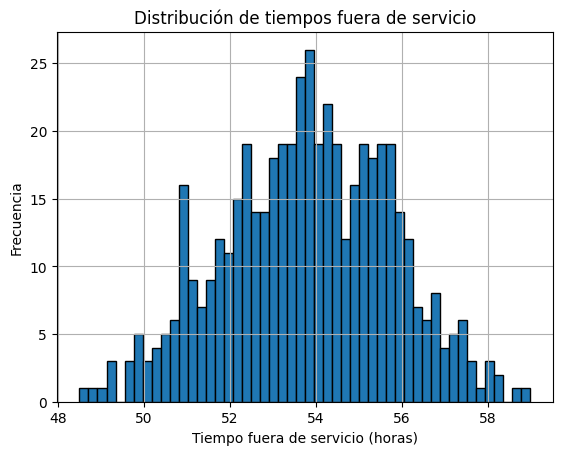

In [105]:
import matplotlib.pyplot as plt

plt.hist(tiempos, bins=50, edgecolor='black')
plt.title("Distribución de tiempos fuera de servicio")
plt.xlabel("Tiempo fuera de servicio (horas)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
